In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame using random numbers
data = {
    'Date': pd.date_range(start='2023-08-01', periods=30, freq='D'),
    'Open': np.random.uniform(low=30000, high=35000, size=30),
    'High': np.random.uniform(low=35000, high=40000, size=30),
    'Low': np.random.uniform(low=25000, high=30000, size=30),
    'Close': np.random.uniform(low=30000, high=35000, size=30),
    'Volume': np.random.uniform(low=1000000, high=5000000, size=30),
    'Market Cap': np.random.uniform(low=500000000, high=800000000, size=30)
}

df = pd.DataFrame(data)


In [2]:
print(df.describe())

                      Date          Open          High           Low  \
count                   30     30.000000     30.000000     30.000000   
mean   2023-08-15 12:00:00  32322.864209  37383.865562  27634.798605   
min    2023-08-01 00:00:00  30092.367870  35033.139976  25302.302516   
25%    2023-08-08 06:00:00  30981.700139  35888.642289  26359.723488   
50%    2023-08-15 12:00:00  32502.142986  37511.252213  27812.105235   
75%    2023-08-22 18:00:00  33276.839562  38808.731477  28746.344948   
max    2023-08-30 00:00:00  34771.868946  39638.351775  29847.100659   
std                    NaN   1400.475575   1604.451400   1401.038195   

              Close        Volume    Market Cap  
count     30.000000  3.000000e+01  3.000000e+01  
mean   32469.586051  2.775005e+06  6.349158e+08  
min    30452.403107  1.003185e+06  5.033994e+08  
25%    30983.919006  1.913674e+06  5.610877e+08  
50%    32571.706693  2.619256e+06  6.236525e+08  
75%    33423.731416  3.674891e+06  7.128457e+08  
m

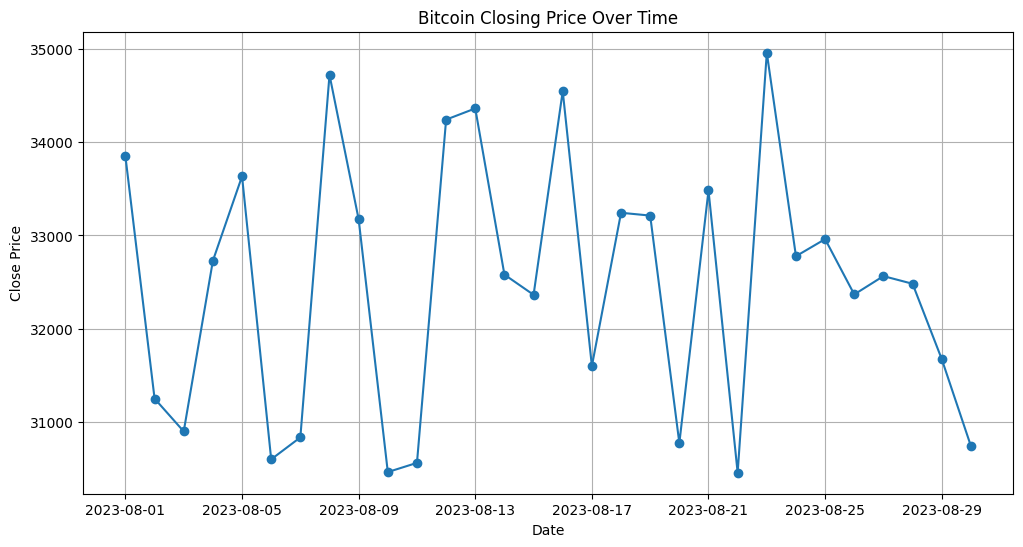

In [5]:
# Plot the time series of the 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

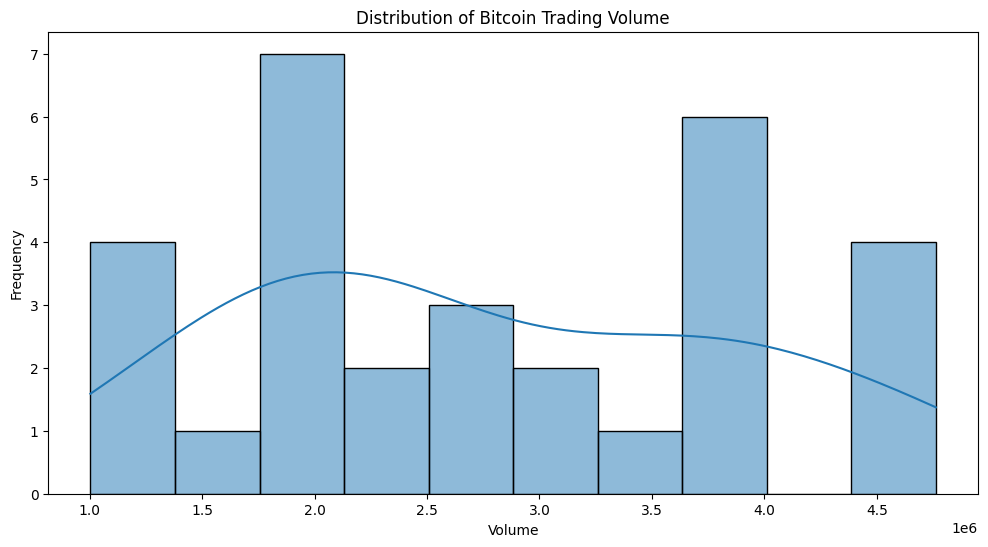

In [9]:
# Plot the distribution of 'Volume'
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=10, kde=True)
plt.title('Distribution of Bitcoin Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

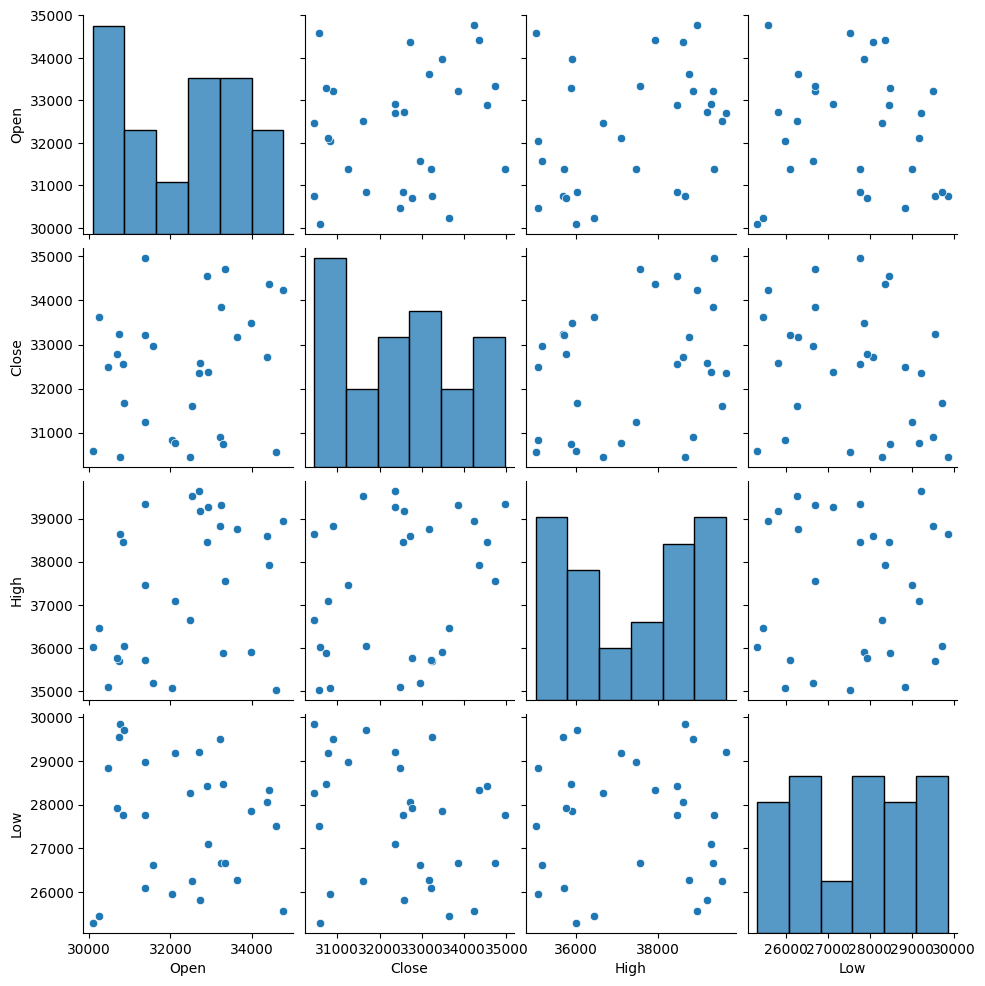

In [11]:
# Create a pair plot
sns.pairplot(df[['Open', 'Close', 'High', 'Low']])
plt.show()

In [13]:
# Calculate the correlation between 'Open', 'High', 'Low', 'Close', and 'Volume'
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.333039 -0.098394  0.190859 -0.074952
High    0.333039  1.000000 -0.011011  0.273554  0.327729
Low    -0.098394 -0.011011  1.000000 -0.258442 -0.155459
Close   0.190859  0.273554 -0.258442  1.000000  0.171693
Volume -0.074952  0.327729 -0.155459  0.171693  1.000000


In [15]:
# Filter for rows where 'Close' price > 'Open' price
positive_gain = df[df['Close'] > df['Open']]

# Calculate the average trading volume
average_volume = df['Volume'].mean()

# Filter for rows where 'Volume' > average trading volume
high_volume = df[df['Volume'] > average_volume]

# Display results
print("Rows with positive gain:\n", positive_gain)
print("\nRows with high trading volume:\n", high_volume)

Rows with positive gain:
          Date          Open          High           Low         Close  \
0  2023-08-01  33231.979060  39307.896677  26676.487409  33848.785960   
4  2023-08-05  30238.374120  36454.313439  25454.888601  33635.576503   
5  2023-08-06  30092.367870  36019.970491  25302.302516  30596.067315   
7  2023-08-08  33346.319588  37561.575829  26679.164593  34724.300408   
15 2023-08-16  32902.816726  38458.255195  28438.530072  34550.052433   
17 2023-08-18  30739.342172  35691.037223  29553.041119  33243.691827   
18 2023-08-19  31387.116639  35724.674205  26094.841302  33213.611985   
22 2023-08-23  31375.944558  39335.729556  27764.382702  34962.343750   
23 2023-08-24  30697.436954  35775.516064  27921.388038  32777.353722   
24 2023-08-25  31585.448814  35200.085875  26628.201747  32960.815749   
26 2023-08-27  30844.015499  38456.674756  27768.497475  32563.682625   
27 2023-08-28  30477.355275  35090.309393  28833.790278  32481.328456   
28 2023-08-29  30850.2853

In [19]:
# Initialize new columns
df['Price Change'] = np.nan
df['Price Trend'] = ''

# Calculate daily price change and apply trend condition
for index, row in df.iterrows():
    df.at[index, 'Price Change'] = row['Close'] - row['Open']
    if row['Close'] > row['Open']:
        df.at[index, 'Price Trend'] = 'Up'
    else:
        df.at[index, 'Price Trend'] = 'Down'


# Display the updated DataFrame
print(df.head())

        Date          Open          High           Low         Close  \
0 2023-08-01  33231.979060  39307.896677  26676.487409  33848.785960   
1 2023-08-02  31386.509774  37460.928598  28987.121027  31248.340821   
2 2023-08-03  33227.905324  38828.730267  29498.020777  30895.778401   
3 2023-08-04  34379.368454  38597.936684  28056.489568  32728.608833   
4 2023-08-05  30238.374120  36454.313439  25454.888601  33635.576503   

         Volume    Market Cap  Price Change Price Trend  
0  2.311954e+06  5.168355e+08    616.806899          Up  
1  3.860364e+06  7.771791e+08   -138.168953        Down  
2  2.117752e+06  5.585227e+08  -2332.126923        Down  
3  2.045262e+06  6.536259e+08  -1650.759621        Down  
4  1.666821e+06  7.172068e+08   3397.202383          Up  
